## NAME    : M.SHAFEEN
## ROLL NO : 22P-9278
## Lab-task 08

### 1. Load the iris dataset using scikit-learn library.

In [319]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
iris = load_iris()

### 2. Create a Pandas DataFrame with the dataset and add column names.

In [320]:
print(iris.feature_names)
df=pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [321]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### 3. Convert the problem into a binary classification problem by only considering two classes and
removing the third one. For example, we can keep only "setosa" and "versicolor" classes and
remove "virginica". Visualize the data using a scatter plot.

In [322]:
rows_to_remove = df[df['target'] == 0]
df = df.drop(rows_to_remove.index)


In [323]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


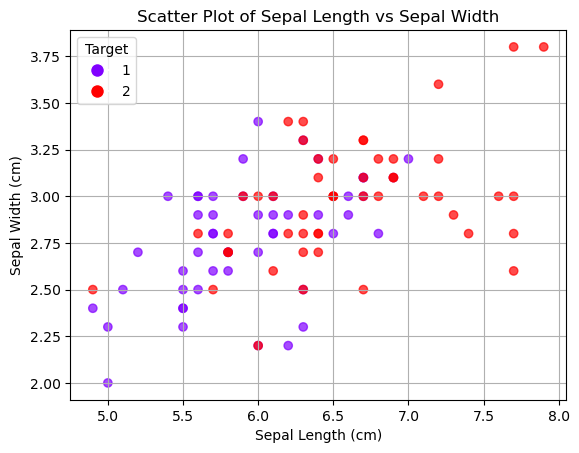

In [324]:
colors = plt.cm.rainbow(np.linspace(0, 1, len(df['target'].unique())))

# Create a dictionary to map each target value to a color
color_dict = {target: color for target, color in zip(df['target'].unique(), colors)}

# Create a list of colors for each point in the scatter plot
colors = df['target'].map(color_dict)

extracted_classes = df[df['target'].isin([0, 1])]

legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=target,
                              markerfacecolor=color_dict[target], markersize=10)
                   for target in df['target'].unique()]

# Plot the scatter plot
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=colors, alpha=0.7)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Scatter Plot of Sepal Length vs Sepal Width')

# Add a legend
plt.legend(handles=legend_elements, title='Target')

# Add a grid
plt.grid(True)

# Show the plot
plt.show()


### 4. Remove the target column from the train and test sets.

In [325]:
X=df.drop('target', axis=1)
y=df['target']

### 5. Split the data into train and test sets.

In [326]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### 6. Apply the built-in Perceptron algorithm from scikit-learn.

In [327]:
from sklearn.linear_model   import Perceptron
ann=Perceptron(eta0=0.1, random_state=0,max_iter=1000)
ann.fit(X_train, y_train)

Perceptron(eta0=0.1)

### 7. Evaluate the accuracy, precision, recall, and F1 score of the model.

#### As we have a multiclass problem here which is why we use ['micro','macro','weighted'] as the average

In [328]:
from sklearn.metrics import accuracy_score,precision_recall_curve,precision_score,recall_score,f1_score
accuracy=accuracy_score(y_test, ann.predict(X_test))
precision=precision_score(y_test, ann.predict(X_test),average='weighted')
recall=recall_score(y_test, ann.predict(X_test),average='weighted')
f1=f1_score(y_test, ann.predict(X_test),average='weighted')

precision_2=precision_score(y_test, ann.predict(X_test),average='micro')
recall_2=recall_score(y_test, ann.predict(X_test),average='micro')
f1_2=f1_score(y_test, ann.predict(X_test),average='micro')

In [329]:
print(f"Accuracy                                : {accuracy}")
print("\n")
print(f"Precision  with weighted as the average : {precision}")
print(f"Recall  with weighted as the average    : {recall}")
print(f"F1 Score  with weighted as the average  : {f1}")
print("\n")
print(f"Precision with micro as the average     : {precision_2}")
print(f"Recall with micro as the average        : {recall_2}")
print(f"F1 Score with micro as the average      : {f1_2}")

Accuracy                                : 0.9666666666666667


Precision  with weighted as the average : 0.9684210526315788
Recall  with weighted as the average    : 0.9666666666666667
F1 Score  with weighted as the average  : 0.9663924794359579


Precision with micro as the average     : 0.9666666666666667
Recall with micro as the average        : 0.9666666666666667
F1 Score with micro as the average      : 0.9666666666666667


### 8. Apply the Perceptron algorithm from scratch using given code snippets.

In [330]:
df2=df

In [331]:
def predict(row, weights):
    activation = weights[0]  # Start with the bias term
    for i in range(len(row) - 1):
        # Convert row[i] to float before multiplication
        activation += weights[i + 1] * float(row[i])
    return 1.0 if activation >= 0.0 else 0.0


In [332]:

def train_weights(train, l_rate, n_epoch):
    # Convert the DataFrame to a list of lists
    train_list = train.values.tolist()
    
    weights = [0.0 for i in range(len(train_list[0]))]
    
    for epoch in range(n_epoch):
        sum_error = 0.0
        for row in train_list:
            prediction = predict(row, weights)
            error = row[-1] - prediction
            sum_error += error**2
            weights[0] = weights[0] + l_rate * error #bias(t+1) = bias(t) + learning_rate * (expected(t) - predicted(t))
            for i in range(len(row)-1):
                weights[i + 1] = weights[i + 1] + l_rate * error * row[i] #w(t+1) = w(t) + learning_rate * (expected(t) - predicted(t)) * x(t)
        print('epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
    return weights


In [342]:
l_rate = 0.4
n_epoch = 10000
weights = train_weights(df2, l_rate, n_epoch)
print(weights)

epoch=0, lrate=0.400, error=50.000
epoch=1, lrate=0.400, error=50.000
epoch=2, lrate=0.400, error=50.000
epoch=3, lrate=0.400, error=50.000
epoch=4, lrate=0.400, error=50.000
epoch=5, lrate=0.400, error=50.000
epoch=6, lrate=0.400, error=50.000
epoch=7, lrate=0.400, error=50.000
epoch=8, lrate=0.400, error=50.000
epoch=9, lrate=0.400, error=50.000
epoch=10, lrate=0.400, error=50.000
epoch=11, lrate=0.400, error=50.000
epoch=12, lrate=0.400, error=50.000
epoch=13, lrate=0.400, error=50.000
epoch=14, lrate=0.400, error=50.000
epoch=15, lrate=0.400, error=50.000
epoch=16, lrate=0.400, error=50.000
epoch=17, lrate=0.400, error=50.000
epoch=18, lrate=0.400, error=50.000
epoch=19, lrate=0.400, error=50.000
epoch=20, lrate=0.400, error=50.000
epoch=21, lrate=0.400, error=50.000
epoch=22, lrate=0.400, error=50.000
epoch=23, lrate=0.400, error=50.000
epoch=24, lrate=0.400, error=50.000
epoch=25, lrate=0.400, error=50.000
epoch=26, lrate=0.400, error=50.000
epoch=27, lrate=0.400, error=50.000
ep

In [334]:
pred = np.array([])
for index, row in df.iterrows():
    prediction = predict(row, weights)
    pred=np.append(pred,prediction)
    print("Expected=%d, Predicted=%d" % (row[-1], prediction))

Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Pred

/tmp/ipykernel_7812/2192225525.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  activation += weights[i + 1] * float(row[i])


In [335]:
pred_df = pd.DataFrame(pred, columns=['prediction'])
pred_df["prediction"].count()

100

### 9. Evaluate the accuracy, precision, recall, and F1 score of the model.

In [336]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3)

In [337]:
len(X_train2), len(X_test2), len(y_train2), len(y_test2)

(70, 30, 70, 30)

In [338]:
if len(df["target"]) == len(pred_df['prediction']):
    print("Match")

Match


In [339]:
y_pred = [predict(row, weights) for row in X_test2.values]
# y_pred

In [340]:
accuracy3=accuracy_score(y_test2,y_pred)
precision3=precision_score(y_test2,y_pred,average='weighted')
recall3=recall_score(y_test2,y_pred,average='weighted')
f13=f1_score(y_test2,y_pred,average='weighted')

precision4=precision_score(y_test2,y_pred,average='micro')
recall4=recall_score(y_test2,y_pred,average='micro')
f14=f1_score(y_test2,y_pred,average='micro')

/home/shafeenkhan/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [341]:
print(f"Accuracy                                : {accuracy3}")
print("\n")
print(f"Precision  with weighted as the average : {precision3}")
print(f"Recall  with weighted as the average    : {recall3}")
print(f"F1 Score  with weighted as the average  : {f13}")
print("\n")
print(f"Precision with micro as the average     : {precision4}")
print(f"Recall with micro as the average        : {recall4}")
print(f"F1 Score with micro as the average      : {f14}")

Accuracy                                : 0.5


Precision  with weighted as the average : 0.25
Recall  with weighted as the average    : 0.5
F1 Score  with weighted as the average  : 0.3333333333333333


Precision with micro as the average     : 0.5
Recall with micro as the average        : 0.5
F1 Score with micro as the average      : 0.5
